# European Social Survey

## This is a biannual survey to measure the attitudes, beliefs and behavior patterns of the various populations in Europe. Using selected questions from the 2012 and 2014 editions, address the following questions. Here is the data <a href='https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv'>file</a>, and here is the <a href='https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html'>codebook</a> with information about the variable coding and content.
### Note: the field idno should not be taken as a unique identifier.

## 1. Did people become less trusting from 2012 to 2014?

In [69]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

ess_raw = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv')
display(ess_raw.head())
ess2012 = ess_raw[ess_raw['year'] == 6]
ess2014 = ess_raw[ess_raw['year'] == 7]

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


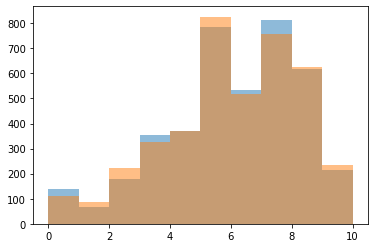

1.4426241793085802e-34

9.222525335052542e-33

In [9]:
plt.hist(ess2012['ppltrst'], alpha=0.5)
plt.hist(ess2014['ppltrst'], alpha=0.5)
plt.show()

_, p2012 = st.shapiro(ess2012['ppltrst'])
_, p2014 = st.shapiro(ess2014['ppltrst'])
display(p2012, p2014)

In [17]:
_, p = st.ttest_ind(ess2012['ppltrst'], ess2014['ppltrst'])
p < 0.05

False

### <span style='color:blue'>Failed to confirm the Null Hypothesis, therefore we can confirm that there is no significant change in the people's trust from 2012 to 2014</span>

## 2. Did people become happier from 2012 to 2014?

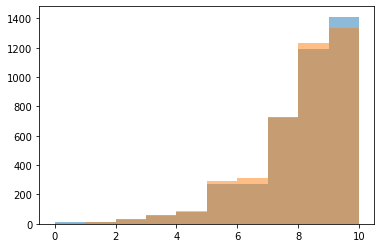

0.0

1.2611686178923354e-44

In [18]:
plt.hist(ess2012['happy'], alpha=0.5)
plt.hist(ess2014['happy'], alpha=0.5)
plt.show()

_, p2012 = st.shapiro(ess2012['happy'])
_, p2014 = st.shapiro(ess2014['happy'])
display(p2012, p2014)

In [25]:
_, p = st.kruskal(ess2012['happy'], ess2014['happy'])
p < 0.05

False

### <span style='color:blue'>Failed to confirm the Null Hypothesis, therefore we can confirm that there is no significant change in the people's happiness from 2012 to 2014</span>

## 3. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

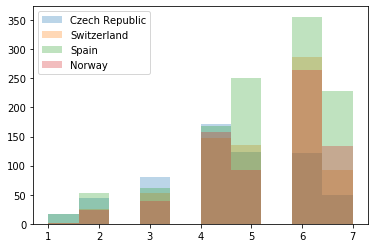

In [70]:
#Switzerland CH

cntrylist = ['CZ', 'CH', 'ES', 'NO']
countries = ['Czech Republic', 'Switzerland', 'Spain', 'Norway']
cntrydict = dict(zip(cntrylist, countries))

ess2014subset = ess2014[ess2014['cntry'].isin(cntrylist)]

for cntry in cntrylist:
    plt.hist(ess2014subset[ess2014subset['cntry'] == cntry]['sclmeet'], alpha=0.3, label=cntrydict[cntry])
plt.legend()
plt.show()

In [65]:
_, p = st.kruskal(ess2014subset[ess2014subset['cntry'] == 'CZ']['sclmeet'], 
                  ess2014subset[ess2014subset['cntry'] == 'CH']['sclmeet'], 
                  ess2014subset[ess2014subset['cntry'] == 'ES']['sclmeet'], 
                  ess2014subset[ess2014subset['cntry'] == 'NO']['sclmeet'])
p < 0.05

True

### <span style='color:blue'>Confirmed the Null Hypothesis, therefore we can state that there is no significant difference in the people's social activity in 2014 among the chosen countries</span>

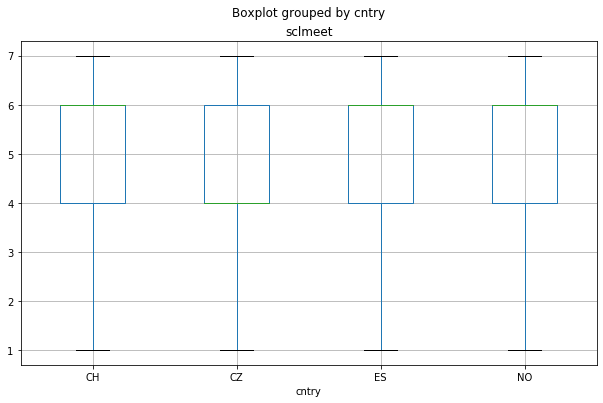

In [66]:
ess2014subset.boxplot('sclmeet', by='cntry', figsize=(10, 6))
plt.show()

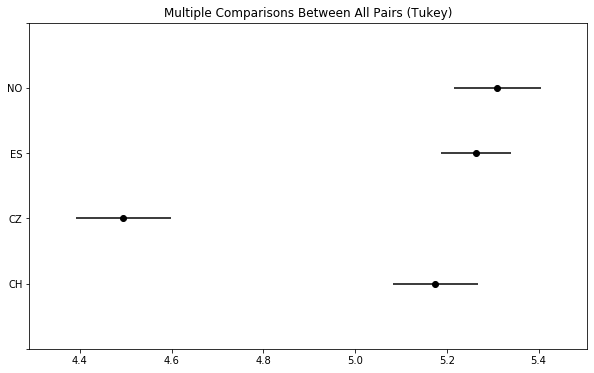

In [84]:
tukey_results = pairwise_tukeyhsd(endog = ess2014subset['sclmeet'],
                          groups = ess2014subset['cntry'],
                          alpha=0.05) 

tukey_results.summary()
tukey_results.plot_simultaneous()
plt.show()

## 4. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

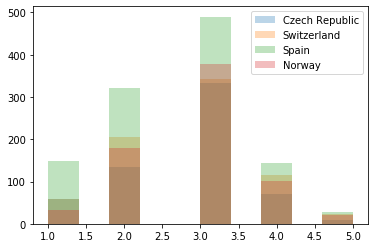

In [71]:
for cntry in cntrylist:
    plt.hist(ess2014subset[ess2014subset['cntry'] == cntry]['sclact'], alpha=0.3, label=cntrydict[cntry])
plt.legend()
plt.show()

In [73]:
_, p = st.kruskal(ess2014subset[ess2014subset['cntry'] == 'CZ']['sclact'], 
                  ess2014subset[ess2014subset['cntry'] == 'CH']['sclact'], 
                  ess2014subset[ess2014subset['cntry'] == 'ES']['sclact'], 
                  ess2014subset[ess2014subset['cntry'] == 'NO']['sclact'])
p < 0.05

True

### <span style='color:blue'>Confirmed the Null Hypothesis, therefore we can state that there is no significant difference in the people's social activity in 2014 among the chosen countries</span>

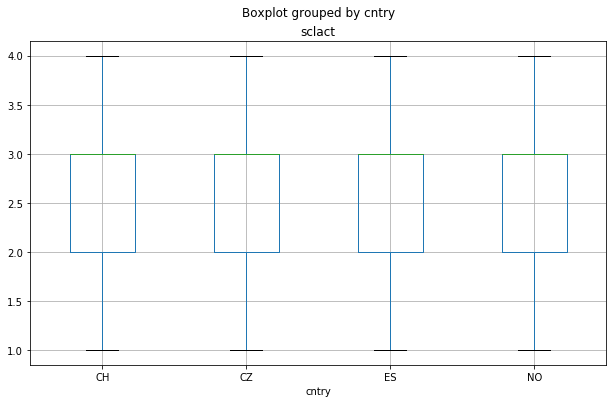

In [81]:
ess2014subset.boxplot('sclact', by='cntry', figsize=(10, 6), showfliers=False)
plt.show()

group1,group2,meandiff,p-adj,lower,upper,reject
CH,CZ,-0.0553,0.6503,-0.1809,0.0703,False
CH,ES,-0.1533,0.0016,-0.2616,-0.0449,True
CH,NO,0.0763,0.3629,-0.0441,0.1967,False
CZ,ES,-0.098,0.1287,-0.2135,0.0175,False
CZ,NO,0.1316,0.0386,0.0047,0.2584,True
ES,NO,0.2296,0.001,0.1198,0.3393,True


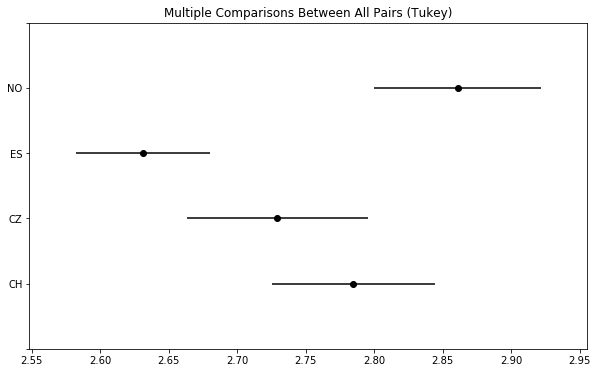

In [83]:
tukey_results = pairwise_tukeyhsd(endog = ess2014subset['sclact'],
                          groups = ess2014subset['cntry'],
                          alpha=0.05) 

display(tukey_results.summary())
tukey_results.plot_simultaneous()
plt.show()

# Ruff Figural Fluency Test 

## This test <a href='https://www.parinc.com/Products/Pkey/360'>provides information about</a> nonverbal capacity for initiation, planning, and divergent reasoning. You can find the data <a href='https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv'>here</a>. The Casenr is a unique identifier.  Of particular use for comparing data points between measurements will be pivot() from Pandas.

## 1. Is there a significant difference in the number of unique designs drawn by the same participants from Measurement 2 to Measurement 3?

In [85]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

rfft_raw = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv')
display(rfft_raw.head())

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


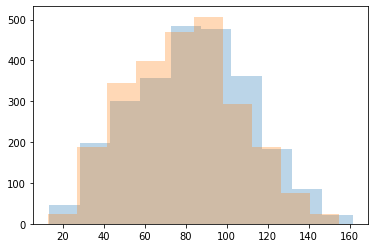

In [109]:
rfft_new = rfft_raw.pivot(index='Casenr', columns='Measurement', values='Unique')
plt.hist(rfft_new['Measurement 3 (2008-2012)'], alpha = .3)
plt.hist(rfft_new['Measurement 2 (2006-2008)'], alpha = .3)
plt.show()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012),M3M2_diff
Casenr,,,,
1,32.0,35.0,50.5,15.5
2,26.0,47.0,71.0,24.0
3,91.0,83.5,77.0,-6.5
4,59.0,54.0,64.0,10.0
5,60.0,68.0,21.0,-47.0


count    2515.000000
mean        4.015507
std        18.499644
min       -75.500000
25%        -7.000000
50%         4.000000
75%        16.000000
max        68.500000
Name: M3M2_diff, dtype: float64

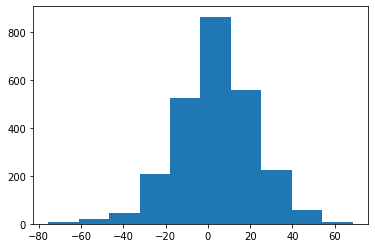

In [110]:
rfft_new['M3M2_diff'] = rfft_new['Measurement 3 (2008-2012)'] - rfft_new['Measurement 2 (2006-2008)']
display(rfft_new.head())
display(rfft_new['M3M2_diff'].describe())
plt.hist(rfft_new['M3M2_diff'])
plt.show()

In [104]:
_, p = st.ttest_rel(rfft_new['Measurement 3 (2008-2012)'], rfft_new['Measurement 2 (2006-2008)'])
p < 0.05

True

### <span style='color:blue'>Confirmed the Null Hypothesis, therefore we can state that there is a significant difference in the participants unique designs between Measurement 2 and 3</span>

## 2. Is there a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3?

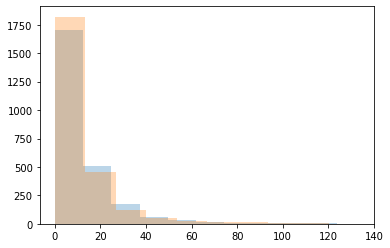

In [112]:
rfft_new = rfft_raw.pivot(index='Casenr', columns='Measurement', values='Perseverative')
plt.hist(rfft_new['Measurement 3 (2008-2012)'], alpha = .3)
plt.hist(rfft_new['Measurement 2 (2006-2008)'], alpha = .3)
plt.show()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012),M3M2_diff
Casenr,,,,
1,1.0,0.0,14.5,14.5
2,3.0,3.0,0.5,-2.5
3,11.0,21.0,17.0,-4.0
4,49.0,39.0,11.0,-28.0
5,14.0,16.0,0.0,-16.0


count    2515.000000
mean        0.330219
std        15.146106
min      -109.000000
25%        -4.000000
50%         0.500000
75%         5.500000
max       116.000000
Name: M3M2_diff, dtype: float64

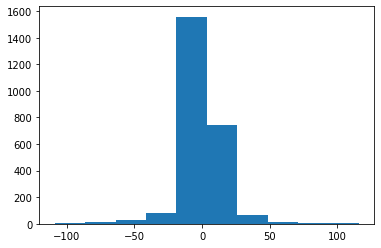

In [114]:
rfft_new['M3M2_diff'] = rfft_new['Measurement 3 (2008-2012)'] - rfft_new['Measurement 2 (2006-2008)']
display(rfft_new.head())
display(rfft_new['M3M2_diff'].describe())
plt.hist(rfft_new['M3M2_diff'])
plt.show()

In [116]:
st.wilcoxon(rfft_new['Measurement 3 (2008-2012)'], rfft_new['Measurement 2 (2006-2008)'])

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)

### <span style='color:blue'>Rejected the Null Hypothesis, therefore we can state that there is a significant difference in the participants perseverative errors between Measurement 2 and 3</span>